In [46]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('Téléchargements'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from nltk import WordNetLemmatizer
#from nltk.corpus import stopwords
##from gensim.utils import lemmatize
from sklearn import model_selection, linear_model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
# Telecharger la dataset 
train_path = "C:/Users/Israe/Desktop/israe/OneDrive/Desktop/AI & ML/Disaster Tweets/train.csv"
test_path ='C:/Users/Israe/Desktop/israe/OneDrive/Desktop/AI & ML/Disaster Tweets/test.csv'
submission_path = 'C:\\Users\\hp\\Downloads\\submission_df2.csv'

# Lire la  dataset
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
#submission_sample = pd.read_csv(submission_path)

In [48]:
#  5 prem lignes de train dataset
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
# 5 prem lignes de test dataset
test_df.head(5)

# 5 prem lignes de submission dataset
#submission_sample.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [50]:

# Forme de la dataset
print("Total number of rows in train dataset are ",train_df.shape[0],'and total number of columns in train dataset are',train_df.shape[1])
print("Total number of rows in test dataset are ",test_df.shape[0],'and total number of columns in test dataset are',test_df.shape[1])


Total number of rows in train dataset are  7613 and total number of columns in train dataset are 5
Total number of rows in test dataset are  3263 and total number of columns in test dataset are 4


In [51]:
# Info basiques de train dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [52]:
#Info basiques de test data
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [53]:
#Valeurs nulles ds train dataset
train_df.isnull().sum()
print(train_df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [54]:
#Valeurs nulles ds test dataset
test_df.isnull().sum()
print(test_df.isnull().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


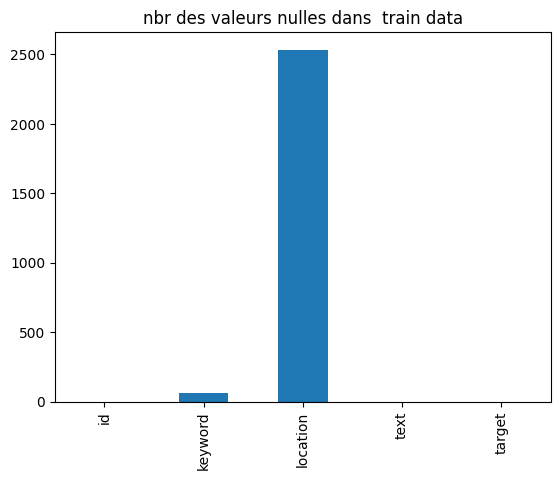

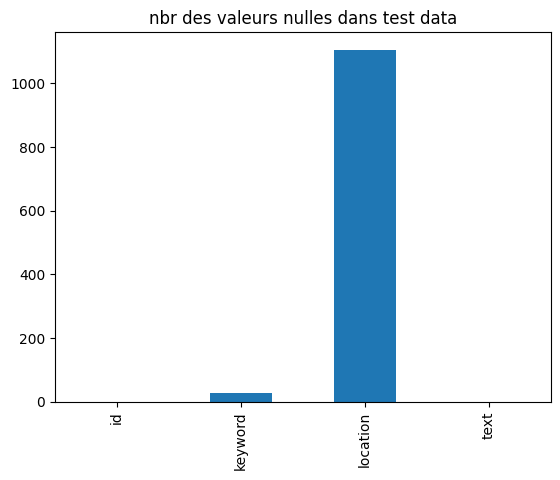

In [55]:
train_df.isna().sum().plot(kind="bar")
plt.title("nbr des valeurs nulles dans  train data")
plt.show()


test_df.isna().sum().plot(kind="bar")
plt.title("nbr des valeurs nulles dans test data")
plt.show()


In [56]:
# Suppression des colonnes Location et Keyword
train_df = train_df.drop(['location','keyword'],axis=1)
test_df = test_df.drop(['location','keyword'],axis=1)
# Entrainement apres suppression des colonnes
train_df.head()


,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


Pourcentage des real Tweets :  42.96597924602653
Pourcentage des fake Tweets :  57.03402075397347


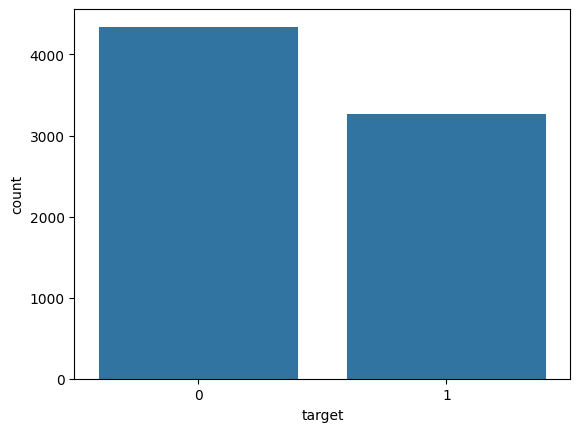

In [57]:
# Trouver le pourcentage de 0 et 1 de target
real_tweets = len(train_df[train_df["target"] == 1])
real_tweets_percentage = real_tweets/train_df.shape[0]*100
fake_tweets_percentage = 100-real_tweets_percentage
print("Pourcentage des real Tweets : ",real_tweets_percentage)
print("Pourcentage des fake Tweets : ",fake_tweets_percentage)

# Tracer les valeurs de target
sns.countplot(x='target',data=train_df)
plt.show()


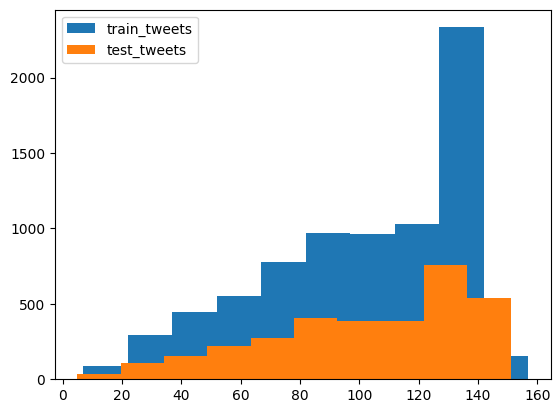

In [58]:
length_train = train_df['text'].str.len() 
length_test = test_df['text'].str.len() 
plt.hist(length_train, label="train_tweets") 
plt.hist(length_test, label="test_tweets") 
plt.legend() 
plt.show()

In [59]:
# disaster tweets
disaster_tweets = train_df[train_df['target'] ==1 ]['text']
for i in range(1,10):
    print(disaster_tweets[i])
    
# non-disaster tweets
non_disaster_tweets = train_df[train_df['target'] !=1 ]['text']


Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...


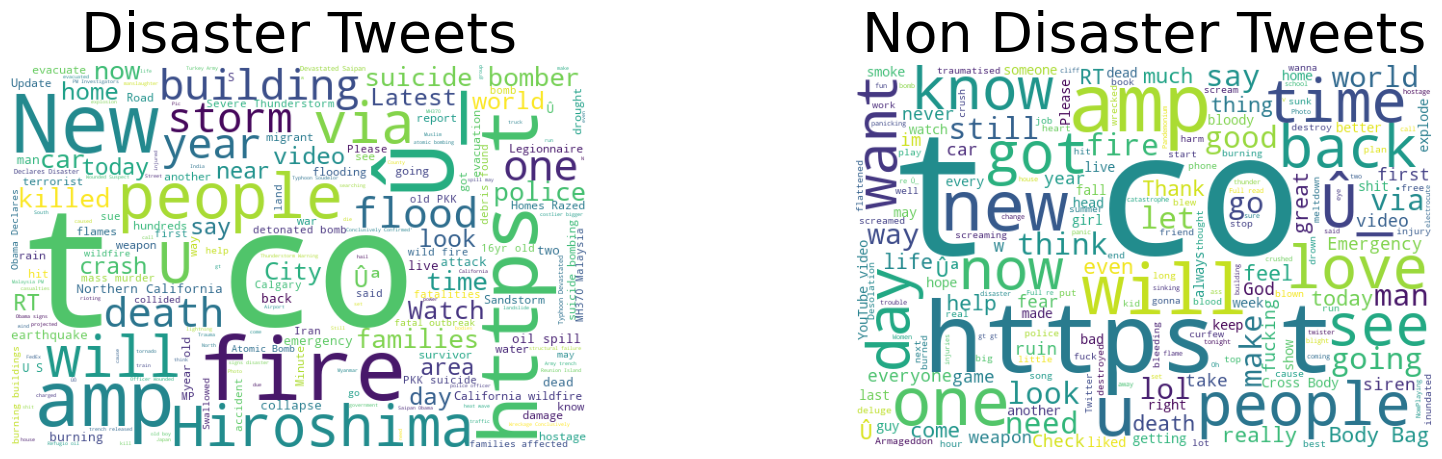

In [60]:
# word cloud de disaster et non-disaster tweets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);


wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);


In [61]:
# Nettoyage du texte
def clean_text(text):
    ''' Rendre le texte en minuscule , supprimer : le texte entre [],liens , ponctuation , les textes contenant des nbrs  .'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:5: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Israe\AppData\Local\Temp\ipykernel_6948\1181549608.py:5: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Israe\AppData\Local\Temp\ipykernel_6948\1181549608.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Israe\AppData\Local\Temp\ipykernel_6948\1181549608.py:10: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [62]:

# Appliquer la fct de nettoyage pour  test et train datasets
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_text(x))



In [63]:
# Mettre a jr le text
train_df['text'].head()

tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
train_df['text'] = train_df['text'].apply(lambda x:tokenizer.tokenize(x))
test_df['text'] = test_df['text'].apply(lambda x:tokenizer.tokenize(x))
train_df['text'].head()


0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [64]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Israe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Israe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# stopwords
stopwords.words('english')
print(stopwords.words('english'))
#nbr des  stopwords
len(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
# supression des stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train_df['text'] = train_df['text'].apply(lambda x : remove_stopwords(x))
test_df['text'] = test_df['text'].apply(lambda x : remove_stopwords(x))
test_df.head()


,id,text
0,0,"[happened, terrible, car, crash]"
1,2,"[heard, earthquake, different, cities, stay, s..."
2,3,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,"[apocalypse, lighting, spokane, wildfires]"
4,11,"[typhoon, soudelor, kills, china, taiwan]"


In [67]:
# lemmatization
lem = WordNetLemmatizer()
def lem_word(x):
    return [lem.lemmatize(w) for w in x]

train_df['text'] = train_df['text'].apply(lem_word)
test_df['text'] = test_df['text'].apply(lem_word)
train_df['text'][:10]

def combine_text(list_of_text):
    '''Prendre des listes de texte et les combiner en un seul texte  .'''
    combined_text = ' '.join(list_of_text)
    return combined_text

train_df['text'] = train_df['text'].apply(lambda x : combine_text(x))
test_df['text'] = test_df['text'].apply(lambda x : combine_text(x))
train_df['text']
train_df.head()


,id,text,target
0,1,deed reason earthquake may allah forgive u,1
1,4,forest fire near la ronge sask canada,1
2,5,resident asked shelter place notified officer ...,1
3,6,people receive wildfire evacuation order calif...,1
4,7,got sent photo ruby alaska smoke wildfire pour...,1


In [68]:
##CountVectorizer
count_vectorizer = CountVectorizer()
train_vector = count_vectorizer.fit_transform(train_df['text'])
test_vector = count_vectorizer.transform(test_df['text'])
print(train_vector[0].todense())


tfidf = TfidfVectorizer(min_df = 2,max_df = 0.5,ngram_range = (1,2))
train_tfidf = tfidf.fit_transform(train_df['text'])
test_tfidf = tfidf.transform(test_df['text'])
tfidf.transform(test_df['text'])


[[0 0 0 ... 0 0 0]]


<3263x10698 sparse matrix of type '<class 'numpy.float64'>'
	with 28614 stored elements in Compressed Sparse Row format>

In [69]:
##Logistic Regression Model
lg = LogisticRegression(C = 1.0)
scores_vector = model_selection.cross_val_score(lg, train_vector, train_df["target"], cv = 5, scoring = "f1")
print("Logistic Regression score:",scores_vector)
scores_tfidf = model_selection.cross_val_score(lg, train_tfidf, train_df["target"], cv = 5, scoring = "f1")
print("score of tfidf:",scores_tfidf)

Logistic Regression score: [0.61904762 0.53401361 0.58340181 0.53521127 0.69756481]
score of tfidf: [0.58502024 0.50644567 0.54725473 0.48190279 0.66840731]


In [70]:
## RidgeClassifier Model.
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vector, train_df["target"], cv=5, scoring="f1")
scores
print("Ridge Classifier :" ,scores)

Ridge Classifier : [0.58976744 0.47118644 0.54136546 0.51332149 0.64969136]


In [71]:
##XGBoost Algorithm
xgb_param = xgb.XGBClassifier(max_depth=5,n_estimators=500,colsample_bytree=0.8,nthread=10,learning_rate=0.05)
scores_vector = model_selection.cross_val_score(xgb_param,train_vector,train_df['target'],cv=5,scoring='f1')
scores_vector
print("XGBoost score :" , scores_vector)

XGBoost score : [0.49194415 0.36132812 0.45201794 0.38004246 0.51601098]


In [73]:
##Prediction
lg.fit(train_tfidf, train_df["target"])
y_pred = lg.predict(test_tfidf)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)